Домашнее задание №6

Датасет:

https://www.cs.toronto.edu/~kriz/cifar.html

https://keras.io/api/datasets/cifar10/

Первый этап: Создание простой архитектуры модели CNN на Keras для CIFAR-10.
- Постройте небольшую сверточную нейронную сеть (CNN) для классификации изображений из набора данных CIFAR-10.
- Используйте не менее 2 сверточных слоев с последующим слоем пулинга.
- Добавьте полносвязный слой и выходной слой с softmax для классификации на 10 классов.
- Нормализуйте данные и обучите модель, используя минимум 10 эпох.
- После обучения модели получите точность и выведите графики точности и потерь для каждой эпохи.

Второй этап: Реализация архитектуры AlexNet.
- Реализуйте архитектуру AlexNet, адаптированную для работы с CIFAR-10 (как в примере).
- Обучите модель также на 10 эпох и получите точность.
- Сравните результаты работы AlexNet с первой простой моделью.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.regularizers
from tensorflow.keras import datasets, layers, models

# Загрузка датасета
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Нормализация данных: приведение значений пикселей в диапазон от 0 до 1
X_train, X_test = X_train / 255.0, X_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 72s 0us/step


In [ ]:
# Строительство модели
model = models.Sequential()

# Первый сверточный слой (64 фильтра 3x3), функция активации ReLU
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))

# Первый слой макспулинга (2x2)
model.add(layers.MaxPooling2D((2, 2)))

# Второй сверточный слой (128 фильтра 3x3), функция активации ReLU
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

# Второй слой макспулинга (2x2)
model.add(layers.MaxPooling2D((2, 2)))

# Третий сверточный слой (128 фильтра 3x3), функция активации ReLU
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

# Преобразование данных в плоский вектор для полносвязного слоя
model.add(layers.Flatten())

# Полносвязный слой с 128 нейронами, и регуляризатором, который применяется к матрице весов ядра
model.add(layers.Dense(128, kernel_regularizer = keras.regularizers.l2(0.0002), activation = 'relu'))

# Слой Dropout для регуляризации: отбрасываем часть нейронов
model.add(layers.Dropout(0.3))

# Выходной слой с 10 нейронами (по числу классов), активация softmax
model.add(layers.Dense(10, activation = 'softmax'))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3313 - loss: 1.8221 - val_accuracy: 0.5552 - val_loss: 1.2555
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5628 - loss: 1.2548 - val_accuracy: 0.6223 - val_loss: 1.1101
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6302 - loss: 1.0839 - val_accuracy: 0.6663 - val_loss: 0.9833
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6720 - loss: 0.9715 - val_accuracy: 0.6651 - val_loss: 1.0020
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7027 - loss: 0.8964 - val_accuracy: 0.7115 - val_loss: 0.8896
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7277 - loss: 0.8301 - val_accuracy: 0.7068 - val_loss: 0.8964
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7463 - loss: 0.7826 - val_accuracy: 0.7272 - val_loss: 0.8624
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7715 - loss: 0.72

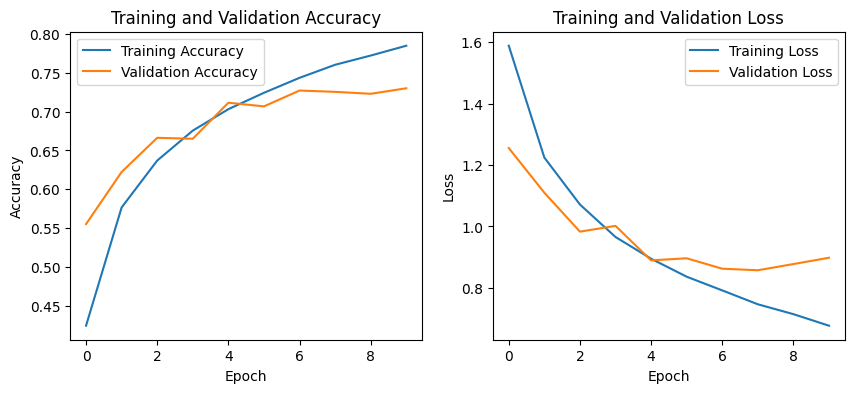

In [ ]:
# Компиляция модели
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

# Визуализация результатов обучения
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [4]:
# Создание модели AlexNet, адаптированной для CIFAR-10
model_a = models.Sequential()

# Первый сверточный слой: 96 фильтров, ядро 3x3, шаг 1, активация ReLU
model_a.add(layers.Conv2D(96, (3, 3), strides = 1, activation = 'relu', input_shape = (32, 32, 3)))
model_a.add(layers.MaxPooling2D((2, 2), strides = 2))

# Второй сверточный слой: 256 фильтров, ядро 3x3, активация ReLU
model_a.add(layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
model_a.add(layers.MaxPooling2D((2, 2), strides = 2))

# Третий сверточный слой: 384 фильтра, ядро 3x3, активация ReLU
model_a.add(layers.Conv2D(384, (3, 3), padding = 'same', activation = 'relu'))

# Четвертый сверточный слой: 384 фильтра, ядро 3x3, активация ReLU
model_a.add(layers.Conv2D(384, (3, 3), padding = 'same', activation = 'relu'))

# Пятый сверточный слой: 256 фильтров, ядро 3x3, активация ReLU
model_a.add(layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
model_a.add(layers.MaxPooling2D((2, 2), strides = 2))

# Преобразование данных в плоский вектор
model_a.add(layers.Flatten())

# Полносвязный слой с 512 нейронами, активация ReLU
model_a.add(layers.Dense(512, activation = 'relu'))
model_a.add(layers.Dropout(0.2))  # Dropout для борьбы с переобучением

# Еще один полносвязный слой с 512 нейронами, активация ReLU
model_a.add(layers.Dense(512, activation = 'relu'))
model_a.add(layers.Dropout(0.2))  # Dropout для борьбы с переобучением

# Выходной слой с 10 нейронами (для CIFAR-10), активация softmax
model_a.add(layers.Dense(10, activation = 'softmax'))

# Компиляция модели
model_a.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Обучение модели
history_alexnet = model_a.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.2691 - loss: 1.9242 - val_accuracy: 0.5149 - val_loss: 1.3381
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.5553 - loss: 1.2419 - val_accuracy: 0.6322 - val_loss: 1.0424
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6421 - loss: 1.0167 - val_accuracy: 0.6644 - val_loss: 0.9411
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6975 - loss: 0.8561 - val_accuracy: 0.6828 - val_loss: 0.9119
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7428 - loss: 0.7408 - val_accuracy: 0.7193 - val_loss: 0.8105
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7678 - loss: 0.6609 - val_accuracy: 0.7147 - val_loss: 0.8502
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7985 - loss: 0.5762 - val_accuracy: 0.7195 - val_loss: 0.8305
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8203 -

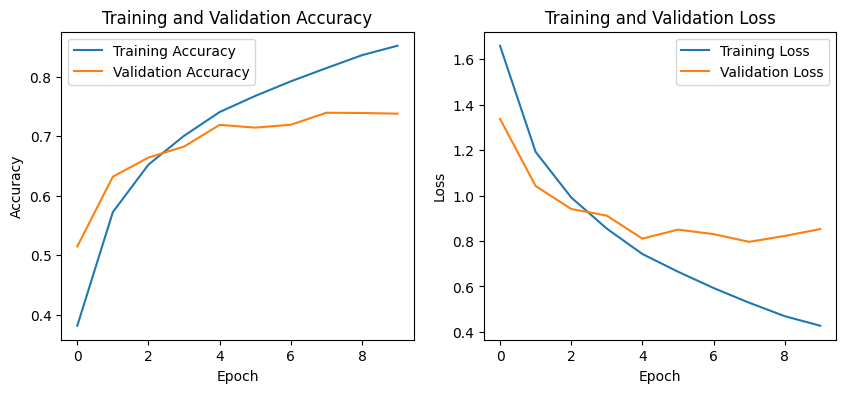

In [6]:
# Визуализация результатов обучения
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'], label = 'Training Loss')
plt.plot(history_alexnet.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Сравним показатели десятых эпох моделей выше:

- Модель, построенная вручную:

Epoch 10 - accuracy: 0.7915 - loss: 0.6507 - val_accuracy: 0.7301 - val_loss: 0.8982

- Модель AlexNet, адаптированная для CIFAR-10:

Epoch 10 - accuracy: 0.8638 - loss: 0.3934 - val_accuracy: 0.7381 - val_loss: 0.8528

Модель AlexNet потребовала больше времени для работы - 246 сек против 87 сек у простой модели. При этом val_accuracy удалось получить чуть повыше и val_loss пониже. Использование регуляризатора, Dropout и увеличение количества нейронов в слоях простой модели, не позволило значимо улучшить результаты, чтобы хоть сколько-то превзойти модель AlexNet. Может превзойти и возможно, подбирая параметры, но после множества попыток, у меня закончились ресурсы на colab.google.